# Quick demo of a CV on MRI data to detect brain tumor
*This is not meant to be a full deployable project, only a quick testing and personal exercise. Please infer with caution.*

- **Result:** 98% accuracy in classifying brain tumor from image. 
- **Train time:** 13s on GPU P100 accelerator, 3 epoch. 


In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection

brain_tumor_dataset  no  yes


In [6]:
no_file_paths = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'
yes_file_paths = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'

num_files_no = len(os.listdir(no_file_paths))
num_files_yes = len(os.listdir(yes_file_paths))

print("Number of No:", num_files_no)
print("Number of Yes:", num_files_yes)

Number of No: 98
Number of Yes: 155


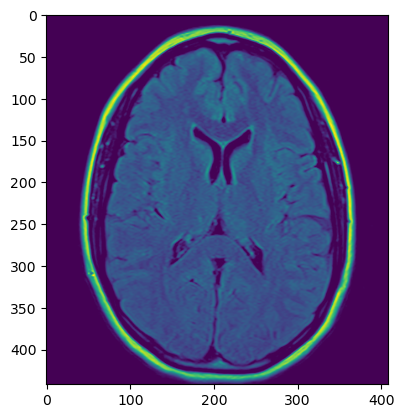

In [11]:
img = mpimg.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 99.jpg")
plt.imshow(img)

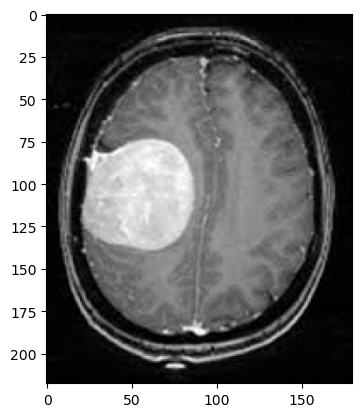

In [9]:
img2 = mpimg.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg")
plt.imshow(img2)

In [10]:
from fastai.vision.all import *

In [12]:
path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/"

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)


# Example of images in the dataset

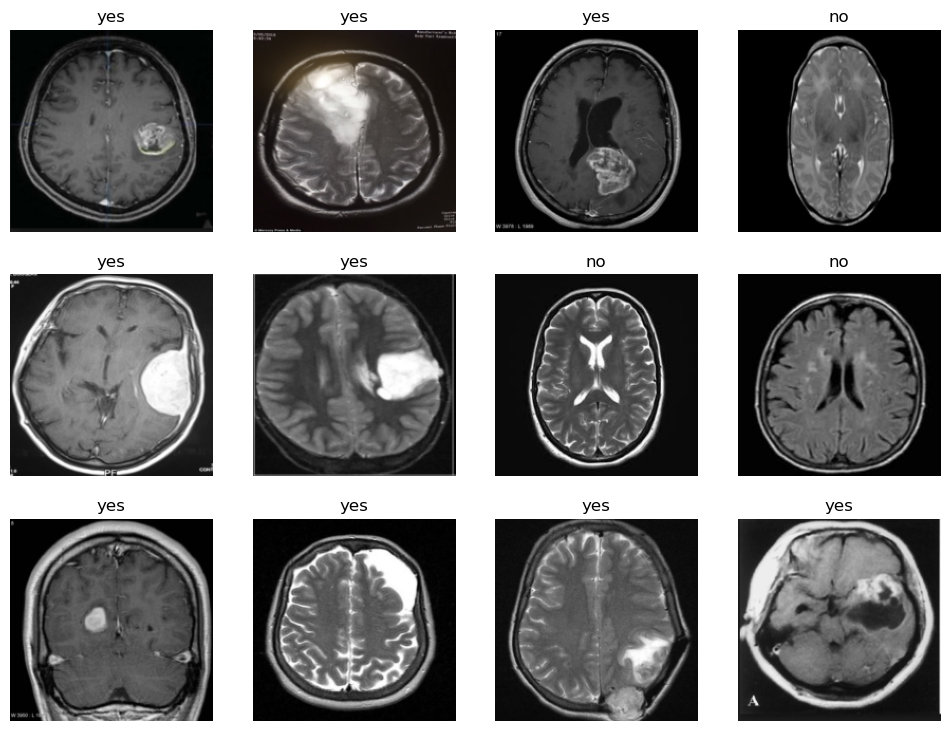

In [15]:
dls.show_batch(max_n=12)

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.875103,0.821437,0.297030,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.272260,0.280489,0.108911,00:04
1,0.166376,0.036533,0.009901,00:04
2,0.121399,0.031767,0.019802,00:05


In [19]:
learn.export('model.pkl')

# Example of Prediction (positive presence of tumor)

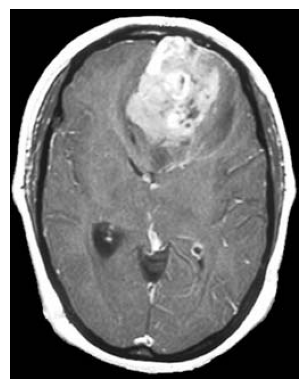

In [20]:
# Set the path of the image
test1 = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y169.jpg'
image = Image.open(test1)

plt.imshow(image)
plt.axis('off')
plt.show()

In [21]:
pred_outcome, _, probs = learn.predict(test1)

print(f"Is there a tumor? Ans: {pred_outcome}.")

Is there a tumor? Ans: yes.


# Example of Prediction (negative presence of tumor)

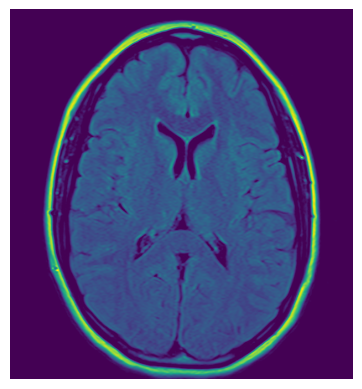

In [22]:
# Set the path of the image
test2 = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 99.jpg'
image = Image.open(test2)

plt.imshow(image)
plt.axis('off')
plt.show()

In [23]:
pred_outcome, _, probs = learn.predict(test2)

print(f"Is there a tumor? Ans: {pred_outcome}.")

Is there a tumor? Ans: no.
